In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/test_notebooks/../../analysis/tools/sidm_processor.py'>

In [2]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "sample" : sample_name, 
    },
).events()

In [3]:
events.pv.fields
(events.ljsource[0, 0].p4 + events.ljsource[0, 1].p4).pt
print(ak.size(ak.flatten(events.ljsource.p4.pt)))
print(ak.size(ak.flatten(ak.ones_like(events.ljsource.p4.pt))))
print(events.weightProduct*ak.ones_like(events.ljsource.p4.pt))

37568
37568
[[0.0612, 0.0612], [0.373], [4.88, 4.88], ... 0.176, 0.176], [4, 4, 4], [0.0781]]


In [4]:
p = sidm_processor.SidmProcessor()
out = p.process(events)

In [5]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': {'4mu': <analysis.tools.cutflow.Cutflow at 0x7f2e05d6f970>,
   '2mu2e': <analysis.tools.cutflow.Cutflow at 0x7f2e05c83be0>},
  'hists': {'pv_n': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Integer(0, 100, name='pv_n', label='pv_n'),
     storage=Weight()) # Sum: WeightedSum(value=1431.94, variance=2029.17),
   'pv_ndof': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Integer(0, 20, name='pv_ndof', label='pv_ndof'),
     storage=Weight()) # Sum: WeightedSum(value=16587.1, variance=24916.4) (WeightedSum(value=38312.7, variance=56727.3) with flow),
   'pv_z': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Regular(100, -50, 50, name='pv_z', label='pv_z'),
     storage=Weight()) # Sum: WeightedSum(value=38312.7, variance=56727.3),
   'pv_rho': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Regular(10

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2e0546d190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

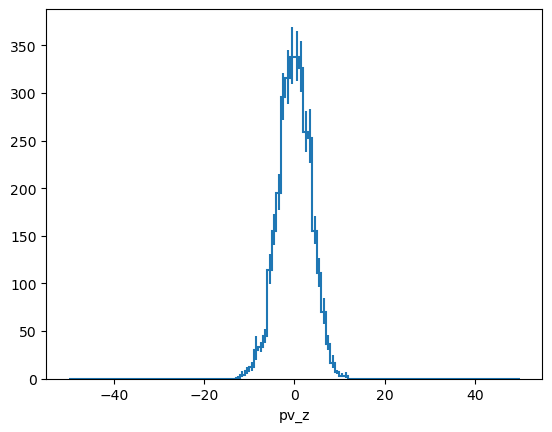

In [6]:
out[sample_name]["hists"]["pv_z"]["4mu", :].plot1d()

In [7]:
out[sample_name]["cutflow"]["2mu2e"].print_table()

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             11518.1      11518.1
PV filter                11518.1      11518.1
Cosmic veto              11518.1      11518.1
>=2 LJs                   1433.1       1433.1
2mu2e                     1324.4       1324.4


In [8]:
out[sample_name]["cutflow"]["2mu2e"].print_table(fraction=True)

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                 12.4          12.4            12.4
2mu2e                   11.5          92.4            11.5


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7db24f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

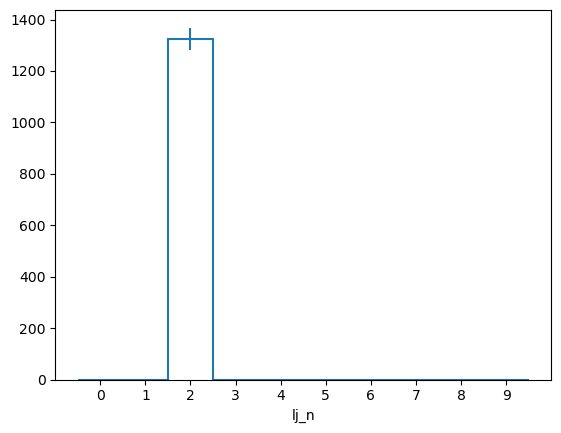

In [9]:
out[sample_name]["hists"]["lj_n"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f320428ed60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

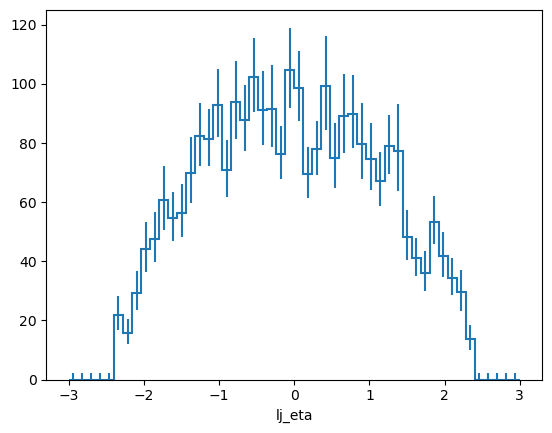

In [10]:
out[sample_name]["hists"]["lj_eta"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7c53cd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

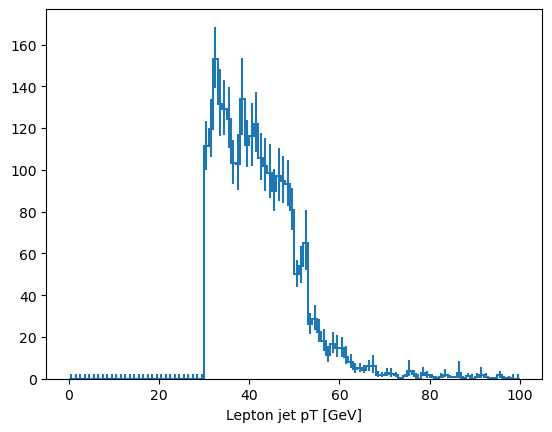

In [11]:
out[sample_name]["hists"]["lj_pt_type"]["2mu2e", :, :].project("lj_pt").plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f2df7af5a30>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7b11070>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7acb2e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

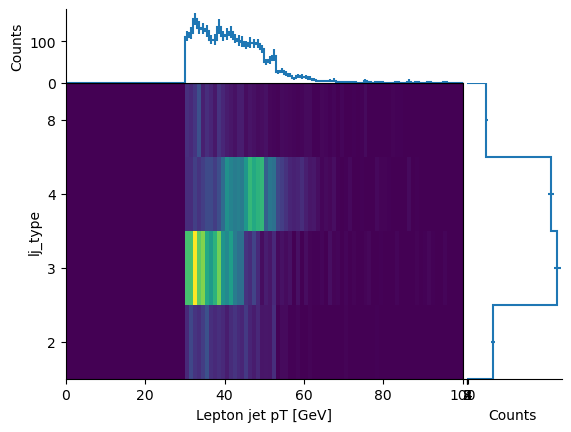

In [12]:
out[sample_name]["hists"]["lj_pt_type"]["2mu2e", :, :].plot2d_full()

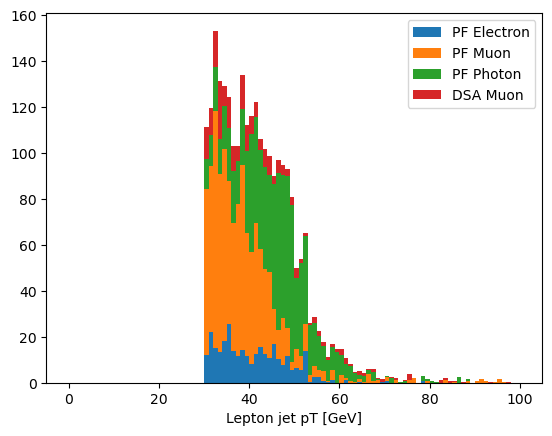

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df79c4dc0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

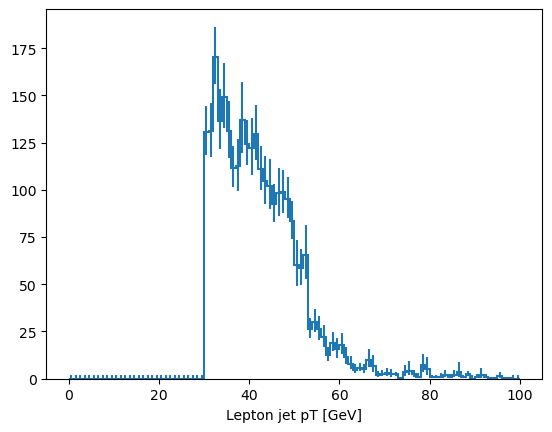

In [13]:
lj_type_names = {
    2 :"PF Electron",
    3 :"PF Muon",
    4 :"PF Photon",
    8 :"DSA Muon",
}
out[sample_name]["hists"]["lj_pt_type"]["2mu2e", :, :].stack("lj_type").plot(stack=True, histtype="fill")
plt.legend(lj_type_names.values())
plt.show()
out[sample_name]["hists"]["lj_pt_type"].project(1).plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7965130>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

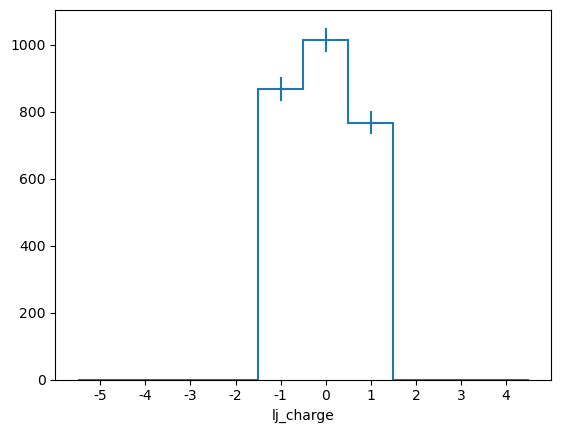

In [14]:
out[sample_name]["hists"]["lj_charge"]["2mu2e", :].plot1d()

In [15]:
ljs = events.ljsource
#ljs = ak.mask(ljs, ak.num(ljs) >= 2)
ljs = ljs[ak.argsort(ljs.p4.pt, ascending=False)]
ljs.p4.pt[ak.num(ljs) >= 2, 1]
print(ak.num(ljs.p4.pt))
print(ak.num(ljs["type"]))
print(ljs.p4.pt)
print(events.weightProduct)

[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[[29.1, 13.4], [35.6], [11.7, 6.41], ... 18.9, 10.5], [72.5, 21.6, 16.9], [31.6]]
[0.0612, 0.373, 4.88, 0.979, 0.922, 0.0589, ... 0.14, 1.12, 0.542, 0.176, 4, 0.0781]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7917a30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df78345b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

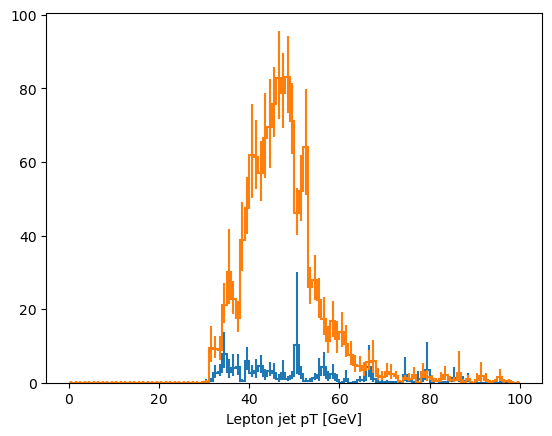

In [16]:
out[sample_name]["hists"]["lj_0_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df78c97c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df778a400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

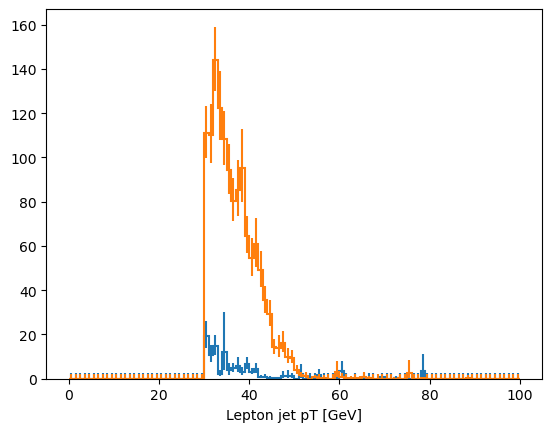

In [17]:
out[sample_name]["hists"]["lj_1_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df78c9c10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df76bdfa0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

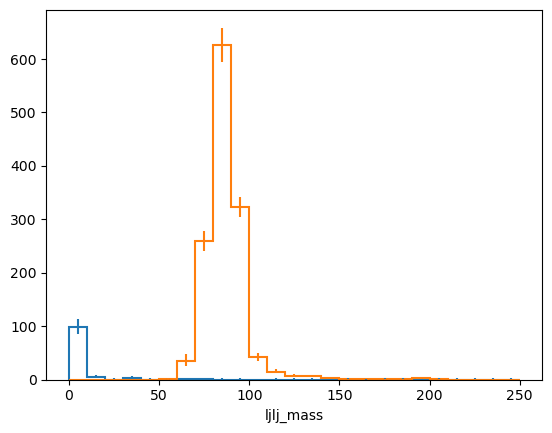

In [18]:
out[sample_name]["hists"]["lj_lj_invmass"][:, :250j].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df7757fd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2df76687c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

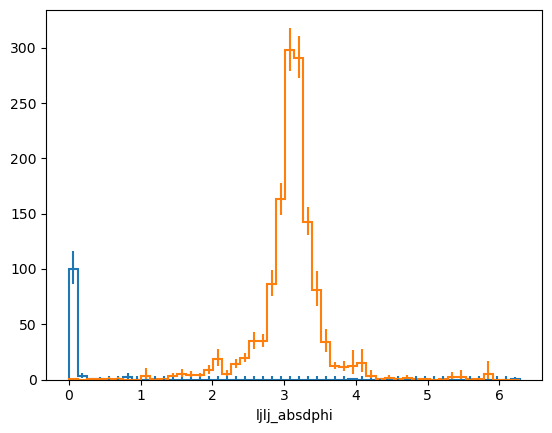

In [19]:
out[sample_name]["hists"]["lj_lj_absdphi"].plot1d()